<img src="https://yt3.googleusercontent.com/onFXI5XE-5BbtI1TLHFQgvwZQvtUYmqDmIEklB7ZJ1Gr2PdWFXrxI-z_2pbf5hhSdpAoe1rV-Q=w1707-fcrop64=1,00005a57ffffa5a8-k-c0xffffffff-no-nd-rj" width="1600" />

######  

In [73]:
# Display the dashboard
HTML(dashboard_html)

In [77]:
HTML(results_html)

Group 1,Group 2,Mean Difference,Adjusted p-value,Significant?
0,6,"605,745.75",0.0016,Yes
1,6,"509,365.26",0.0072,Yes
2,6,"528,482.54",0.0077,Yes
3,6,"591,342.49",0.0011,Yes
4,6,"569,533.58",0.0047,Yes
5,6,"658,470.17",0.0032,Yes


#### Display

In [78]:
from IPython.display import HTML

results_html = """
<style>
    .hypothesis-box {
        background: #2d2d2d;
        border: 1px solid #444;
        border-radius: 8px;
        padding: 20px;
        margin: 15px 0;
        color: #ffffff;
    }
    .hypothesis-title {
        color: #58a6ff;
        font-size: 18px;
        margin-bottom: 10px;
    }
    .significant {
        color: #2ecc71;
        font-weight: bold;
    }
    .not-significant {
        color: #e74c3c;
    }
    table {
        width: 100%;
        border-collapse: collapse;
        margin: 15px 0;
        background: #1e1e1e;
    }
    th, td {
        border: 1px solid #444;
        padding: 8px;
        text-align: center;
    }
    th {
        background: #2d2d2d;
    }
</style>

<div class="hypothesis-box">
    <div class="hypothesis-title">► Hypothesis 1: Shorter videos have higher engagement</div>
    <div class="not-significant">
        T-statistic: 0.19 | p-value: 0.8465<br>
        Result: Not statistically significant (α = 0.05)
    </div>
</div>

<div class="hypothesis-box">
    <div class="hypothesis-title">► Hypothesis 2: Videos published on specific days perform better</div>
    <div class="significant">
        Significant differences found between publication days:
    </div>
    
    <table>
        <tr>
            <th>Group 1</th>
            <th>Group 2</th>
            <th>Mean Difference</th>
            <th>Adjusted p-value</th>
            <th>Significant?</th>
        </tr>
        <tr>
            <td>0</td>
            <td>6</td>
            <td>605,745.75</td>
            <td>0.0016</td>
            <td class="significant">Yes</td>
        </tr>
        <tr>
            <td>1</td>
            <td>6</td>
            <td>509,365.26</td>
            <td>0.0072</td>
            <td class="significant">Yes</td>
        </tr>
        <tr>
            <td>2</td>
            <td>6</td>
            <td>528,482.54</td>
            <td>0.0077</td>
            <td class="significant">Yes</td>
        </tr>
        <tr>
            <td>3</td>
            <td>6</td>
            <td>591,342.49</td>
            <td>0.0011</td>
            <td class="significant">Yes</td>
        </tr>
        <tr>
            <td>4</td>
            <td>6</td>
            <td>569,533.58</td>
            <td>0.0047</td>
            <td class="significant">Yes</td>
        </tr>
        <tr>
            <td>5</td>
            <td>6</td>
            <td>658,470.17</td>
            <td>0.0032</td>
            <td class="significant">Yes</td>
        </tr>
    </table>
    
    <div class="significant" style="margin-top: 10px;">
        Key Finding: Videos published on Day 6 perform significantly better<br>
        than all other days (p < 0.01 in all significant comparisons)
    </div>
</div>
"""

In [72]:
from IPython.display import HTML

dashboard_html = """
<style>
    .dashboard {
        display: grid;
        grid-template-columns: 1fr 1fr;
        gap: 20px;
        padding: 20px;
        background: #2d2d2d;  /* Darker background to match notebook theme */
        border-radius: 10px;
        margin-top: 20px;
        border: 1px solid #444;
    }
    .chart {
        border: 1px solid #444;
        padding: 15px;
        background: #1e1e1e;  /* Dark chart background */
        border-radius: 8px;
        color: #ffffff;  /* White text */
    }
    .title {
        text-align: center;
        color: #ffffff;  /* White color for dark background */
        margin-bottom: 20px;
        font-family: Arial, sans-serif;
        font-size: 24px;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.5);
    }
    .chart h3 {
        color: #58a6ff;  /* Bright blue for subheadings */
        margin-top: 0;
    }
</style>

<h2 class="title">Alex the Analyst YouTube Content Analytics</h2>

<div class="dashboard">
    <!-- Top Row -->
    <div class="chart">
        <h3>Video Duration Distribution</h3>
        <img src="plot1.png" style="width:100%; height:auto;">
    </div>
    <div class="chart">
        <h3>Likes vs. Views</h3>
        <img src="plot2.png" style="width:100%; height:auto;">
    </div>

    <!-- Bottom Row -->
    <div class="chart">
        <h3>Comments Analysis</h3>
        <img src="plot3.png" style="width:100%; height:70%;">
    </div>
    <div class="chart">
        <h3>Upload Time Impact</h3>
        <img src="plot4.png" style="width:100%; height:auto;">
    </div>
</div>
"""

#### Pulling the video data using the YouTube Data API

In [1]:
# import the necessary library
import os
import pandas as pd
from googleapiclient.discovery import build
from dotenv import load_dotenv 

In [4]:
# loading the api key from the environment variable
api = os.getenv('API_KEY')
load_dotenv('C:/Users/WOYES/Desktop/Alex_video_Analysis/API_KEY.env')

True

In [5]:
# initiating the youtube api instance
youtube = build('youtube', 'v3', developerKey = api)

# alex youtube channel id
channel_id = "UC7cs8q-gJRlGwj4A8OmCmXg"

In [6]:
# getting the upload playlist ID
channel_info = youtube.channels().list(
                part = 'contentDetails',
                id = channel_id
).execute()

channel_info

{'kind': 'youtube#channelListResponse',
 'etag': 'Gbu6fjt2uOexIf4deIrnb-LY958',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'xDiHSFF8exKFo3s4XYEScnJuZpk',
   'id': 'UC7cs8q-gJRlGwj4A8OmCmXg',
   'contentDetails': {'relatedPlaylists': {'likes': '',
     'uploads': 'UU7cs8q-gJRlGwj4A8OmCmXg'}}}]}

In [7]:
# function to get the upload playlist ID
def get_upload_playlist(youtube, channel_id):
    channel_info = youtube.channels().list(
                part = 'contentDetails',
                id = channel_id
            ).execute()
    return channel_info['items'][0]['contentDetails']['relatedPlaylists']['uploads']


In [8]:
uploads_playlist = get_upload_playlist(youtube, channel_id)
uploads_playlist

'UU7cs8q-gJRlGwj4A8OmCmXg'

In [9]:
# function to fetching the video ids in the channel
def get_all_videos(youtube, playlist_id):
   
    video_ids = []
    next_page_token = None
    
    while True:
        request = youtube.playlistItems().list(
            part="contentDetails",
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()
        
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break
    
    return video_ids


In [10]:
playlist_id = 'UU7cs8q-gJRlGwj4A8OmCmXg'
video_ids = get_all_videos(youtube, playlist_id)
# video_ids

In [11]:
response = youtube.videos().list(
    part="snippet,contentDetails,statistics",
    id="oi9W142ELN0"
    ).execute()

response

{'kind': 'youtube#videoListResponse',
 'etag': 'f91aMalLxtuuV-M_2WUPg2EwAwY',
 'items': [{'kind': 'youtube#video',
   'etag': 'MUVAzhCb-sF1ayfdvwErCQSwZ5A',
   'id': 'oi9W142ELN0',
   'snippet': {'publishedAt': '2025-03-25T12:01:10Z',
    'channelId': 'UC7cs8q-gJRlGwj4A8OmCmXg',
    'title': '1 Million YouTube Play Button Unboxing!',
    'description': "Thank you all who have supported me over these past 5 years! It really has meant the world to me and I can't thank you all enough!\n\n50% off anything on AnalystBuilder.com - Code: MILLION50\n*Expires Tonight at Midnight EST*\n____________________________________________ \n\nRESOURCES:\n\n💻Analyst Builder - https://www.analystbuilder.com/\n\n📖Take my Full MySQL Course Here: https://bit.ly/3tqOipr\n📖Take my Full Python Course Here: https://bit.ly/48O581R\n📖Practice Technical Interview Questions: https://bit.ly/46pDqqL\n\nCoursera Courses:\nGoogle Data Analyst Certification: https://coursera.pxf.io/5bBd62\nData Analysis with Python - http

In [15]:
# function in fetching the video details
def get_video_details(youtube_client, video_ids):
    stats = []
    
    for i in range(0, len(video_ids), 50):
        batch = video_ids[i:i+50]
        request = youtube_client.videos().list(
            part="statistics,snippet,contentDetails",
            id=','.join(batch))
        response = request.execute()
        
        for item in response['items']:
            data = {
                'title': item['snippet']['title'],
                'description': item['snippet'].get('description', ''),
                'views': int(item['statistics'].get('viewCount', 0)),
                'likes': int(item['statistics'].get('likeCount', 0)),
                'comments': int(item['statistics'].get('commentCount', 0)),
                'duration': item['contentDetails']['duration'],
                'published': item['snippet']['publishedAt']
            }
            stats.append(data)
    
    return stats

In [16]:
video_data = get_video_details(youtube, video_ids)
video_data

[{'title': 'How to Lie with Data | Percentages and Baseline Numbers',
  'description': "It's so easy to lie with data!\n\nIn fact, it happens all the time, but we just may not realize it (cough cough *all news networks*)\n\nIn this series I show you some of the most common ways to lie with data!\n\n____________________________________________ \n\nRESOURCES:\n\n💻Analyst Builder - https://www.analystbuilder.com/\n\n📖Take my Full MySQL Course Here: https://bit.ly/3tqOipr\n📖Take my Full Python Course Here: https://bit.ly/48O581R\n📖Practice Technical Interview Questions: https://bit.ly/46pDqqL\n\nCoursera Courses:\nGoogle Data Analyst Certification: https://coursera.pxf.io/5bBd62\nData Analysis with Python - https://coursera.pxf.io/BXY3Wy\nIBM Data Analysis Specialization - https://coursera.pxf.io/AoYOdR\nTableau Data Visualization - https://coursera.pxf.io/MXYqaN\n\nUdemy Courses:\nPython for Data Science - https://bit.ly/3Z4A5K6\nStatistics for Data Science - https://bit.ly/37jqDbq\nSQL f

In [17]:
# converting the fetched data into dataframe
df = pd.DataFrame(video_data)
df

,title,description,views,likes,comments,duration,published
0,How to Lie with Data | Percentages and Baselin...,"It's so easy to lie with data!\n\nIn fact, it ...",2687,147,7,PT5M18S,2025-04-01T12:00:46Z
1,1 Million YouTube Play Button Unboxing!,Thank you all who have supported me over these...,2450,209,77,PT7M40S,2025-03-25T12:01:10Z
2,Maven Analytics + Analyst Builder Lifetime Acc...,📖Analyst Builder + Maven Analytics Promotion: ...,7300,238,39,PT5M15S,2025-03-24T12:00:07Z
3,How to Lie with Data | Misleading Graphs,"It's so easy to lie with data!\n\nIn fact, it ...",4511,257,21,PT5M26S,2025-03-18T12:01:07Z
4,Where to find the Best Healthcare Data,In this video I'm going to show you where you ...,5896,335,22,PT7M51S,2025-03-11T12:00:02Z
...,...,...,...,...,...,...,...
350,Data Analyst Resume | Reviewing My Resume! | F...,Data Analyst Resume | Reviewing My Resume! | F...,80066,1743,63,PT7M33S,2020-01-30T14:07:55Z
351,Working at a Big Company Vs Small Company | To...,Working at a Big Company Vs Small Company | To...,15890,422,23,PT5M50S,2020-01-25T16:38:39Z
352,Data Analyst Salary | 100k with No Experience,Data Analyst Salary | 100k with No Experience ...,66167,2235,229,PT5M3S,2020-01-23T03:16:09Z
353,Truth About Big Companies | Told by a Fortune ...,Truth About Big Companies // There are a ton o...,9637,343,20,PT5M45S,2020-01-21T03:52:15Z


### Exploratory Analysis of Video Performance Metrics 

    (Views, Engagement, Duration Trends, and Keyword Insights)

- Summary stats for views, likes, comments, and duration
- Distribution of Video Durations (Minutes)
- Top 5 videos by views
- Top 5 videos by engagement (likes/view)
- Metrics Correlation
- Quartely View Trend
- Most Common Keywords in top 10% viewed videos

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


In [21]:
df.head(5)

,title,views,likes,comments,duration,published
0,How to Lie with Data | Percentages and Baselin...,2546,144,7,PT5M18S,2025-04-01T12:00:46Z
1,1 Million YouTube Play Button Unboxing!,2417,209,77,PT7M40S,2025-03-25T12:01:10Z
2,Maven Analytics + Analyst Builder Lifetime Acc...,7242,236,39,PT5M15S,2025-03-24T12:00:07Z
3,How to Lie with Data | Misleading Graphs,4497,257,21,PT5M26S,2025-03-18T12:01:07Z
4,Where to find the Best Healthcare Data,5863,333,22,PT7M51S,2025-03-11T12:00:02Z


In [22]:
# create the duration to second column
def duration_to_seconds(duration):
    hours = re.search(r'(\d+)H', duration)
    minutes = re.search(r'(\d+)M', duration)
    seconds = re.search(r'(\d+)S', duration)

    total = 0
    if hours: total += int(hours.group(1))*3600
    if minutes: total += int(minutes.group(1))*60
    if seconds: total += int(seconds.group(1))
    return total       

In [23]:
df['duration_sec'] = df['duration'].apply(duration_to_seconds)
df.head()

,title,views,likes,comments,duration,published,duration_sec
0,How to Lie with Data | Percentages and Baselin...,2546,144,7,PT5M18S,2025-04-01T12:00:46Z,318
1,1 Million YouTube Play Button Unboxing!,2417,209,77,PT7M40S,2025-03-25T12:01:10Z,460
2,Maven Analytics + Analyst Builder Lifetime Acc...,7242,236,39,PT5M15S,2025-03-24T12:00:07Z,315
3,How to Lie with Data | Misleading Graphs,4497,257,21,PT5M26S,2025-03-18T12:01:07Z,326
4,Where to find the Best Healthcare Data,5863,333,22,PT7M51S,2025-03-11T12:00:02Z,471


In [24]:
df['likes_per_view'] = df['likes'] / df['views']
df['comments_per_view'] = df['comments'] / df['views']

In [25]:
df.head()

,title,views,likes,comments,duration,published,duration_sec,likes_per_view,comments_per_view
0,How to Lie with Data | Percentages and Baselin...,2546,144,7,PT5M18S,2025-04-01T12:00:46Z,318,0.056559,0.002749
1,1 Million YouTube Play Button Unboxing!,2417,209,77,PT7M40S,2025-03-25T12:01:10Z,460,0.086471,0.031858
2,Maven Analytics + Analyst Builder Lifetime Acc...,7242,236,39,PT5M15S,2025-03-24T12:00:07Z,315,0.032588,0.005385
3,How to Lie with Data | Misleading Graphs,4497,257,21,PT5M26S,2025-03-18T12:01:07Z,326,0.057149,0.004670
4,Where to find the Best Healthcare Data,5863,333,22,PT7M51S,2025-03-11T12:00:02Z,471,0.056797,0.003752


- Summary stats for views, likes, comments, and duration

In [26]:
numeric_columns = ['views','likes','comments','duration_sec']
summary = df[numeric_columns].describe().applymap(lambda x:f"{x:.2f}")
summary

,views,likes,comments,duration_sec
count,355.00,355.00,355.00,355.00
mean,135364.97,3291.22,180.83,1742.80
std,250854.90,5630.41,384.16,4854.52
min,1582.00,65.00,5.00,9.00
25%,13298.50,440.50,31.00,399.00
50%,38904.00,1379.00,76.00,744.00
75%,138854.00,3464.50,160.50,1613.50
max,2124078.00,46239.00,4335.00,84768.00


- Distribution of Video Durations (Minutes)

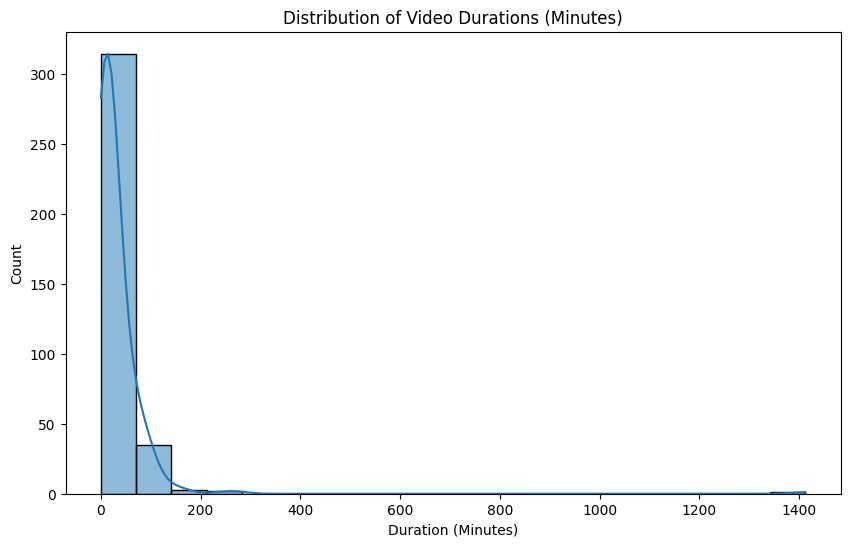

In [54]:
df['duration_min'] = df['duration_sec']/60

plt.figure(figsize=(10, 6))
sns.histplot(df['duration_min'], bins=20, kde=True)
plt.title("Distribution of Video Durations (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.savefig('plot1.png', bbox_inches='tight')
plt.show()

- Top 5 videos by views

In [28]:
top_views = df.nlargest(5, 'views')[['title','views','likes','comments']]
top_views

,title,views,likes,comments
260,Data Analyst Portfolio Project | SQL Data Expl...,2124078,36380,4335
163,FREE Data Analyst Bootcamp!!,1891743,46239,1753
343,SQL Basics Tutorial For Beginners | Installing...,1461868,18613,2060
164,How to Become a Data Analyst in 2023 (Complete...,1316705,43535,1313
320,What Does a Data Analyst Actually Do?,1021876,19749,501


- Top 5 videos by engagement (likes/view)

In [29]:
top_engagement = df.nlargest(5,'likes_per_view')[['title','likes_per_view']]
top_engagement

,title,likes_per_view
25,Nobody cares... so just do it!,0.102770
125,LINK: https://www.youtube.com/playlist?list=PL...,0.094423
124,#wife #careerchange #dataanalysis,0.093650
27,Free Data Analyst Bootcamp 2024,0.091795
245,100k Subscriber Play Button Unboxing,0.088839


In [30]:
top_engagement.loc[125,'title']

'LINK: https://www.youtube.com/playlist?list=PLUaB-1hjhk8FE_XZ87vPPSfHqb6OcM0cF'

- Correlation matrix

In [31]:
corr_matrix = df[['views', 'likes','comments']].corr()

# corr_matrix

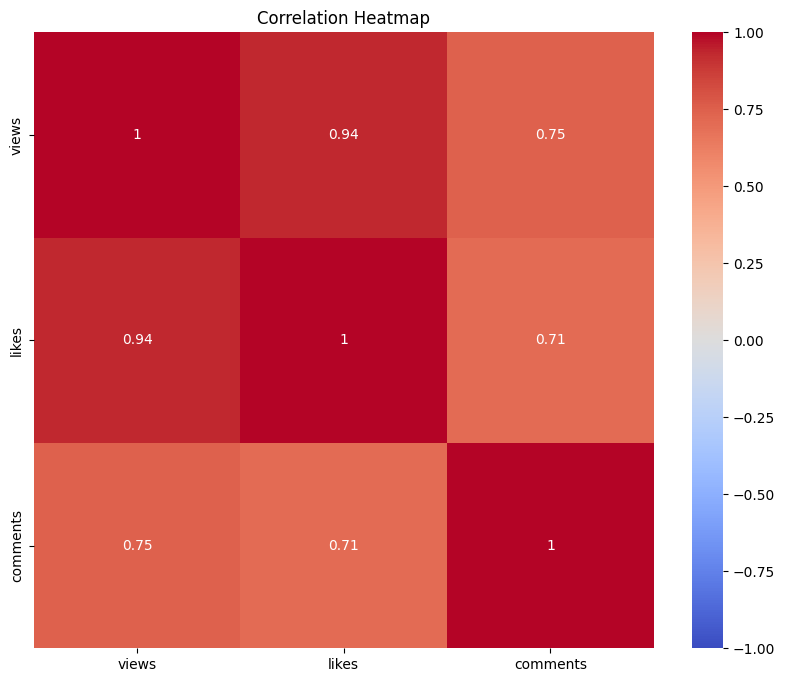

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.savefig('plot2.png', bbox_inches='tight')
plt.show()

- Quartely View Trend

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              355 non-null    object 
 1   views              355 non-null    int64  
 2   likes              355 non-null    int64  
 3   comments           355 non-null    int64  
 4   duration           355 non-null    object 
 5   published          355 non-null    object 
 6   duration_sec       355 non-null    int64  
 7   likes_per_view     355 non-null    float64
 8   comments_per_view  355 non-null    float64
 9   duration_min       355 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 27.9+ KB


In [34]:
df['published'] = pd.to_datetime(df['published'])

In [35]:
df['upload_quarter'] = df['published'].dt.to_period('Q').astype(str)

C:\Users\WOYES\AppData\Local\Temp\ipykernel_2020\3553810093.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['upload_quarter'] = df['published'].dt.to_period('Q').astype(str)


In [36]:
df.tail()

,title,views,likes,comments,duration,published,duration_sec,likes_per_view,comments_per_view,duration_min,upload_quarter
350,Data Analyst Resume | Reviewing My Resume! | F...,80049,1743,63,PT7M33S,2020-01-30 14:07:55+00:00,453,0.021774,0.000787,7.550000,2020Q1
351,Working at a Big Company Vs Small Company | To...,15890,422,23,PT5M50S,2020-01-25 16:38:39+00:00,350,0.026558,0.001447,5.833333,2020Q1
352,Data Analyst Salary | 100k with No Experience,66164,2235,229,PT5M3S,2020-01-23 03:16:09+00:00,303,0.033780,0.003461,5.050000,2020Q1
353,Truth About Big Companies | Told by a Fortune ...,9636,343,20,PT5M45S,2020-01-21 03:52:15+00:00,345,0.035596,0.002076,5.750000,2020Q1
354,Top 3 Data Analyst Skills in 2020,30674,1453,142,PT2M40S,2020-01-17 14:31:39+00:00,160,0.047369,0.004629,2.666667,2020Q1


In [37]:
quarterly_stats = df.groupby('upload_quarter').agg({
    'views':'sum',
    'likes_per_view':'mean',
    'comments_per_view': 'mean'
}).reset_index()

quarterly_stats

,upload_quarter,views,likes_per_view,comments_per_view
0,2020Q1,4095232,0.026080,0.002118
1,2020Q2,2206585,0.029587,0.001495
2,2020Q3,3520372,0.028140,0.005933
3,2020Q4,2003497,0.034733,0.009926
4,2021Q1,2597696,0.026609,0.002817
5,2021Q2,5253438,0.028862,0.004312
6,2021Q3,1904310,0.038723,0.006136
7,2021Q4,2420271,0.033948,0.002536
8,2022Q1,2824863,0.033192,0.004380
9,2022Q2,2612398,0.029309,0.003026


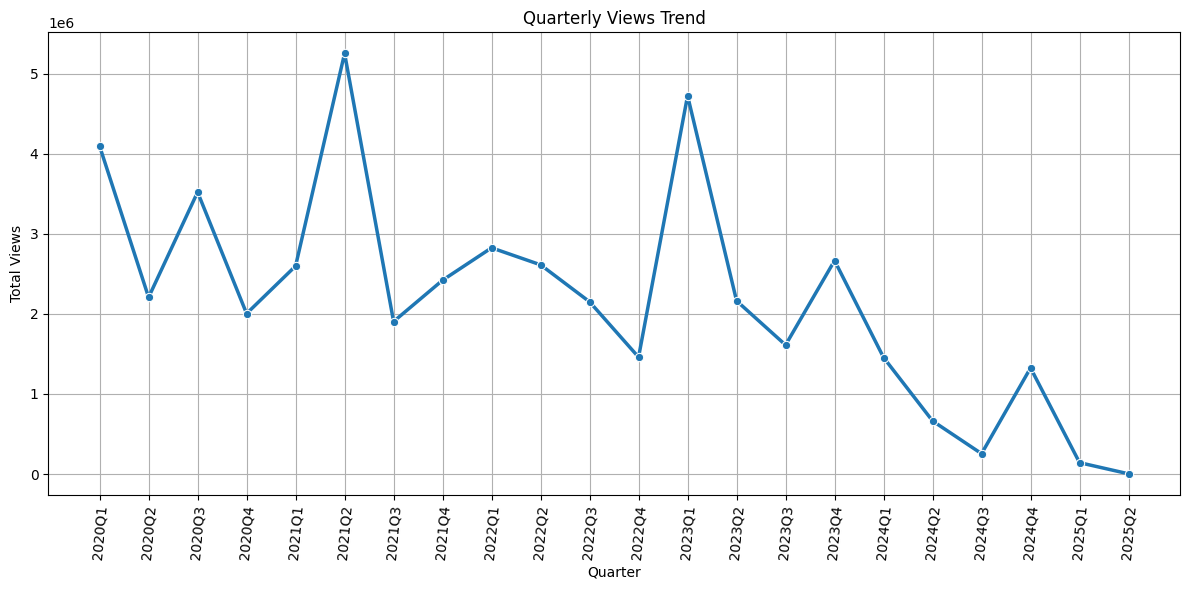

In [56]:

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=quarterly_stats, x='upload_quarter', y='views', marker='o', linewidth=2.5)


plt.xticks(rotation=85)
plt.title("Quarterly Views Trend")
plt.xlabel("Quarter")
plt.ylabel("Total Views")
plt.tight_layout()
plt.grid(True)
plt.savefig('plot3.png', bbox_inches='tight')
plt.show()

- keywords from titles of top 10% viewed videos

In [39]:
top_10_percent = df.nlargest(int(len(df)*0.1), 'views')
# top_10_percent

In [40]:
words = [word. lower() for title in top_10_percent['title'] for word in re.findall(r'\w+', title)]
Counter(words).most_common(10)

[('data', 23),
 ('for', 17),
 ('analyst', 16),
 ('beginners', 12),
 ('in', 12),
 ('to', 11),
 ('sql', 10),
 ('a', 10),
 ('how', 9),
 ('excel', 9)]

### Hypothesis Testing

In [44]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### ► Shorter videos have higher engagement

In [45]:
median_duration = df['duration_sec'].median()
short_videos = df[df['duration_sec'] < median_duration]
long_videos = df[df['duration_sec'] >= median_duration]

In [46]:
t_stat, p_value = stats.ttest_ind(short_videos['views'], long_videos['views'], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

T-statistic: 0.19, p-value: 0.8465


If p-value < 0.05, reject the null hypothesis (i.e., shorter videos have significantly different views).

However, the p-value > 0.05, so we fail to reject the null hypothesis

#### ► Videos published on specific days perform better

In [47]:
df['day_of_week'] = df['published'].dt.dayofweek
df.head()

,title,views,likes,comments,duration,published,duration_sec,likes_per_view,comments_per_view,duration_min,upload_quarter,day_of_week
0,How to Lie with Data | Percentages and Baselin...,2546,144,7,PT5M18S,2025-04-01 12:00:46+00:00,318,0.056559,0.002749,5.300000,2025Q2,1
1,1 Million YouTube Play Button Unboxing!,2417,209,77,PT7M40S,2025-03-25 12:01:10+00:00,460,0.086471,0.031858,7.666667,2025Q1,1
2,Maven Analytics + Analyst Builder Lifetime Acc...,7242,236,39,PT5M15S,2025-03-24 12:00:07+00:00,315,0.032588,0.005385,5.250000,2025Q1,0
3,How to Lie with Data | Misleading Graphs,4497,257,21,PT5M26S,2025-03-18 12:01:07+00:00,326,0.057149,0.004670,5.433333,2025Q1,1
4,Where to find the Best Healthcare Data,5863,333,22,PT7M51S,2025-03-11 12:00:02+00:00,471,0.056797,0.003752,7.850000,2025Q1,1


In [48]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_groups = [df[df['day_of_week'] ==i]['views']for i in range(7)]

f_stat, p_value = f_oneway(*day_groups)
print(f_stat, p_value)

3.8384668187768867 0.001012540259239309


In [49]:
if p_value < 0.05:
    tukey = pairwise_tukeyhsd(endog = df['views'], groups = df['day_of_week'], alpha = 0.05)
    print(tukey.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
     0      1   96380.4963  0.652  -77197.8375    269958.83  False
     0      2   77263.2142 0.9369 -137217.5322  291743.9605  False
     0      3   14403.2603    1.0 -178528.3151  207334.8358  False
     0      4   36212.1711 0.9995 -210358.1061  282782.4482  False
     0      5  -52724.4123 0.9993 -393023.7247  287574.9001  False
     0      6  605745.7544 0.0016  154287.7001 1057203.8087   True
     1      2  -19117.2821 0.9997 -162454.9601  124220.3958  False
     1      3  -81977.2359 0.2763  -190449.777   26495.3051  False
     1      4  -60168.3252 0.9641 -248159.2849  127822.6345  False
     1      5 -149104.9086 0.7618 -449683.2202   151473.403  False
     1      6  509365.2581 0.0072   87040.6505  931689.8657   True
     2      3  -62859.9538 0.9213  -229109.299  103389.3913  F

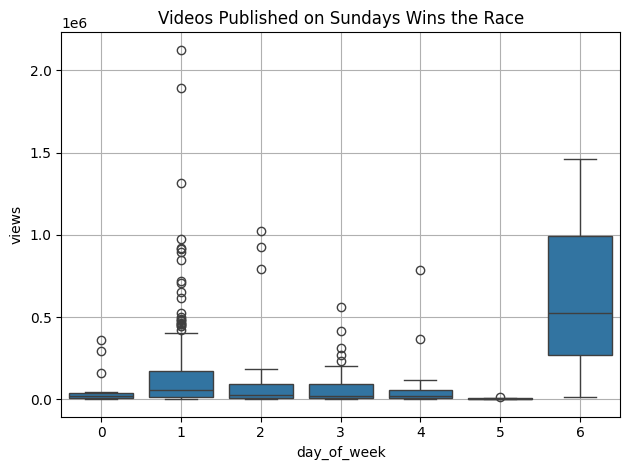

In [57]:
sns.boxplot(x='day_of_week', y='views', data=df)

plt.title("Videos Published on Sundays Wins the Race")
plt.tight_layout()
plt.grid(True)
plt.savefig('plot4.png', bbox_inches='tight')
plt.show()